<a href="https://colab.research.google.com/github/IlyaGalyukshev/colab/blob/main/KNNRegressor%2BLinearRegressor%2BCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('/content/AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [25]:
# num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver',
            'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'cont_rating']

In [24]:
# cat_cols = np.setdiff1d(data.columns, num_cols)
cat_cols = ['currency', 'prime_genre']

In [26]:
target = 'user_rating'

In [28]:
cols = num_cols + cat_cols + [target]
cols

['size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'cont_rating',
 'currency',
 'prime_genre',
 'user_rating']

In [29]:
data = data[cols]
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4+,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4+,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4+,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12+,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4+,USD,Reference,4.5


In [ ]:
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)

In [32]:
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [36]:
data.shape

(7197, 11)

In [37]:
data.isna().sum()

size_bytes          0
price               0
rating_count_tot    0
rating_count_ver    0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
cont_rating         0
currency            0
prime_genre         0
user_rating         0
dtype: int64

In [40]:
for col in cat_cols:
  print(f'{col} distribution')
  print(data[col].value_counts())
  print()

currency distribution
USD    7197
Name: currency, dtype: int64

prime_genre distribution
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [43]:
data = data.drop(['currency'], axis=1)
cat_cols.remove('currency')
cols.remove('currency')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5


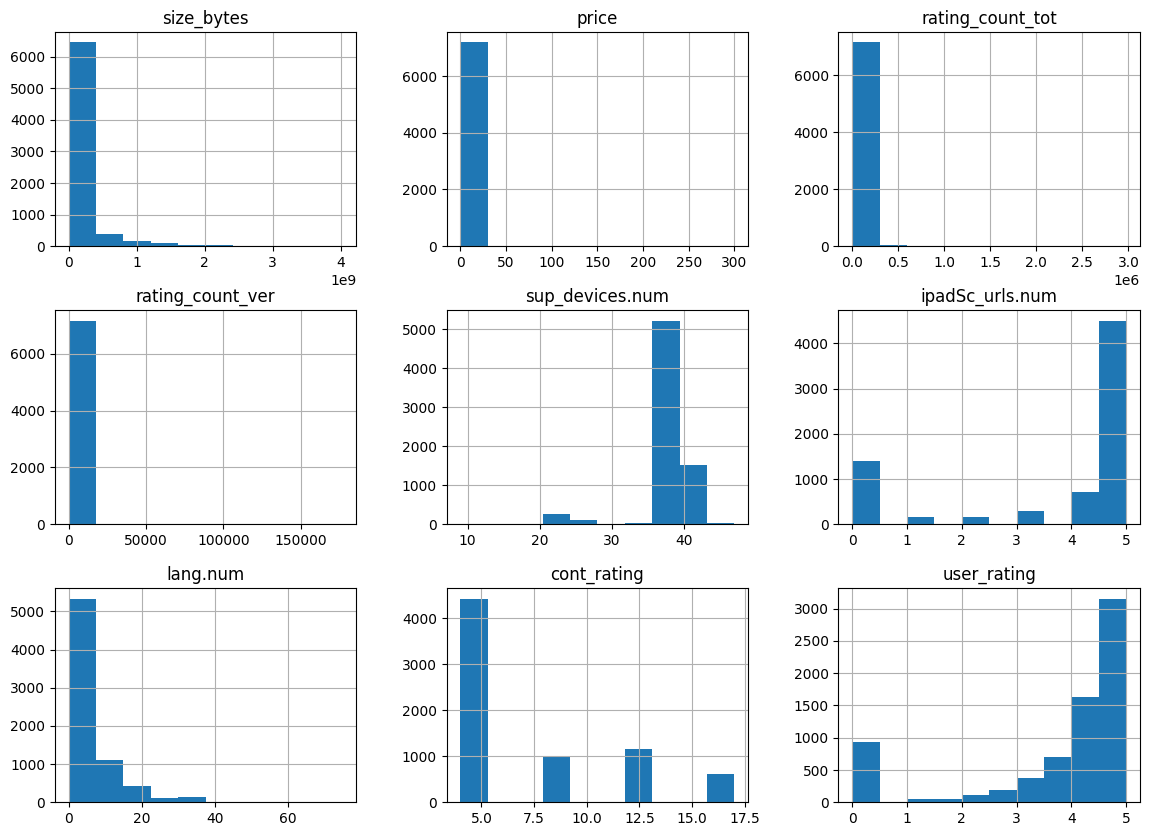

In [46]:
data.hist(column=cols, figsize = (14, 10))
None

In [53]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-53-96612fe94b20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-53-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1.00,0.18,0.00,0.01,-0.12,0.15,0.00,0.14,0.07
price,0.18,1.00,-0.04,-0.02,-0.12,0.07,-0.01,-0.03,0.05
rating_count_tot,0.00,-0.04,1.00,0.16,0.01,0.02,0.14,0.01,0.08
rating_count_ver,0.01,-0.02,0.16,1.00,0.04,0.02,0.01,0.00,0.07
sup_devices.num,-0.12,-0.12,0.01,0.04,1.00,-0.04,-0.04,0.02,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,-0.04,1.00,0.09,-0.11,0.27
lang.num,0.00,-0.01,0.14,0.01,-0.04,0.09,1.00,-0.07,0.17
cont_rating,0.14,-0.03,0.01,0.00,0.02,-0.11,-0.07,1.00,-0.10
user_rating,0.07,0.05,0.08,0.07,-0.04,0.27,0.17,-0.10,1.00


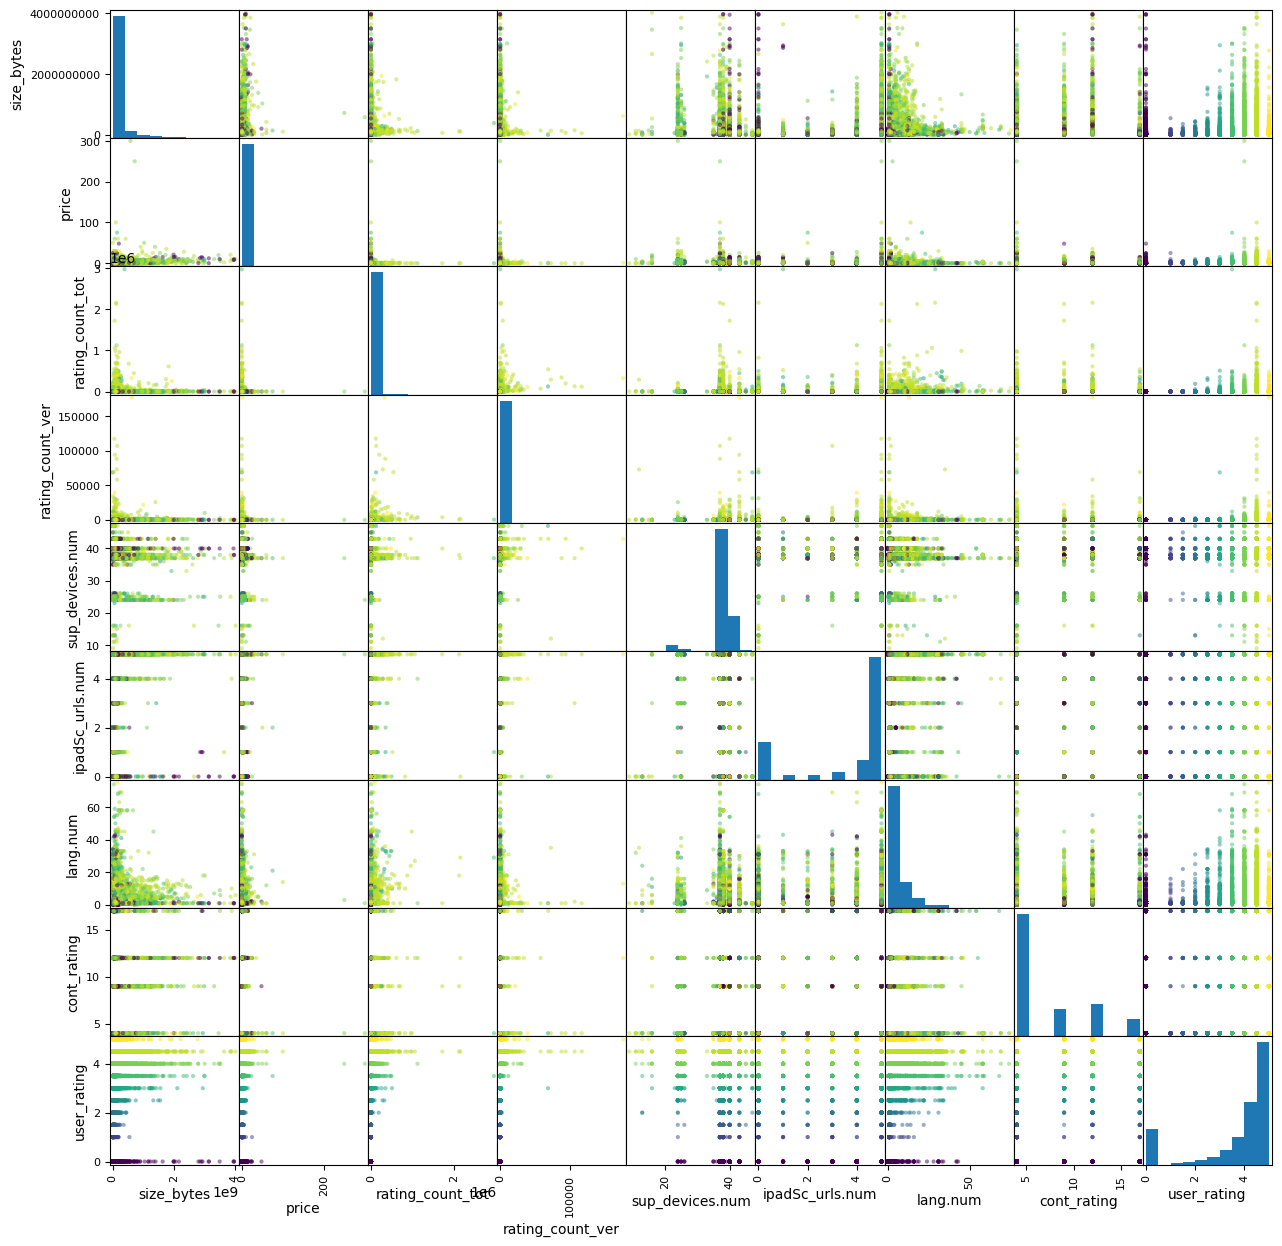

In [57]:
pd.plotting.scatter_matrix(data, c=data[target], figsize=(15, 15))
None

In [59]:
data['is_free'] = (data['price'] == 0)
cat_cols.append('is_free')
cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


In [67]:
data = pd.get_dummies(data, columns=cat_cols)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,prime_genre_Book,...,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,is_free_False,is_free_True,is_free_False,is_free_True
0,100788224,3.99,21292,26,38,5,10,4,4.0,0,...,0,0,0,0,0,0,1,0,1,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,0,...,0,0,0,0,0,0,0,1,0,1
2,100524032,0.00,188583,2822,37,5,3,4,3.5,0,...,0,0,0,0,0,1,0,1,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,0,...,1,0,0,0,0,0,0,1,0,1
4,92774400,0.00,985920,5320,37,5,45,4,4.5,0,...,0,0,0,0,0,0,0,1,0,1


In [68]:
cat_cols_new = []
for col in cat_cols:
  cat_cols_new.extend(filter(lambda x: x.startswith(col), data.columns))
cat_cols = cat_cols_new
cat_cols

['prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather',
 'is_free_False',
 'is_free_True',
 'is_free_False',
 'is_free_True',
 'is_free_False',
 'is_free_True',
 'is_free_False',
 'is_free_True']

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[num_cols + cat_cols])

X = scaler.transform(data[num_cols + cat_cols])
X

array([[-0.27380615,  0.38812569,  0.11090232, ...,  1.13635756,
        -1.13635756, -1.13635756],
       [-0.11291148, -0.29596024,  1.95647669, ..., -0.88000471,
         0.88000471,  0.88000471],
       [-0.27454169, -0.29596024,  2.31982667, ..., -0.88000471,
         0.88000471,  0.88000471],
       ...,
       [-0.24447871,  0.04522548, -0.17004096, ...,  1.13635756,
        -1.13635756, -1.13635756],
       [-0.283696  , -0.29596024, -0.16911668, ..., -0.88000471,
         0.88000471,  0.88000471],
       [-0.30134036, -0.29596024, -0.17019941, ..., -0.88000471,
         0.88000471,  0.88000471]])

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data[target], test_size=0.2)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
def print_metrics(y, y_preds):
  print(f'r2_score: {r2_score(y, y_preds)}')
  print(f'mean_squared_error: {mean_squared_error(y, y_preds)}')

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print_metrics(y_test, lr.predict(X_test))
print_metrics(y_test, knn.predict(X_test))

r2_score: 0.1332064588052202
mean_squared_error: 2.0785654567042022
r2_score: 0.20553088225246163
mean_squared_error: 1.9051319444444448


In [75]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

cross_validate(LinearRegression(), X, data[target], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'MSE': make_scorer(mean_squared_error)})

{'fit_time': array([0.0323441 , 0.03701234, 0.04018545, 0.0334785 , 0.03386903]),
 'score_time': array([0.0115695 , 0.00533533, 0.00531816, 0.00456309, 0.00510859]),
 'test_r2_score': array([-0.83178616,  0.06553118,  0.11573287,  0.1089905 ,  0.07226212]),
 'test_MSE': array([1.66687947, 1.48867415, 1.94041629, 2.82049776, 2.92824811])}

In [76]:
cross_validate(KNeighborsRegressor(), X, data[target], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'MSE': make_scorer(mean_squared_error)})

{'fit_time': array([0.00870895, 0.00781035, 0.0056262 , 0.0132494 , 0.00763893]),
 'score_time': array([0.25229192, 0.20867515, 0.18900752, 0.21031213, 0.21501923]),
 'test_r2_score': array([-0.60497402, -0.00737105,  0.02899882,  0.18954437,  0.07457368]),
 'test_MSE': array([1.46048611, 1.6048125 , 2.13074357, 2.56550382, 2.92095205])}

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsRegressor(),
                          [{'n_neighbors': [1, 2, 3, 10, 15, 20]}], cv=5,
                           verbose=10)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_neighbors=1...............................................
[CV 1/5; 1/6] END ...............n_neighbors=1;, score=-0.333 total time=   0.2s
[CV 2/5; 1/6] START n_neighbors=1...............................................
[CV 2/5; 1/6] END ...............n_neighbors=1;, score=-0.344 total time=   0.2s
[CV 3/5; 1/6] START n_neighbors=1...............................................
[CV 3/5; 1/6] END ...............n_neighbors=1;, score=-0.579 total time=   0.1s
[CV 4/5; 1/6] START n_neighbors=1...............................................
[CV 4/5; 1/6] END ...............n_neighbors=1;, score=-0.256 total time=   0.1s
[CV 5/5; 1/6] START n_neighbors=1...............................................
[CV 5/5; 1/6] END ...............n_neighbors=1;, score=-0.469 total time=   0.1s
[CV 1/5; 2/6] START n_neighbors=2...............................................
[CV 1/5; 2/6] END ...............n_neighbors=2;, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 10, 15, 20]}], verbose=10)

In [84]:
print_metrics(y_test, grid_search.predict(X_test))

r2_score: 0.23390819238630378
mean_squared_error: 1.8370833333333334


In [86]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
model = KNeighborsRegressor()

In [91]:
metrics = []
for train_idx, test_idx in kf.split(X_train):
  model.fit(X_train[train_idx], y_train.values[train_idx])
  pred = model.predict(X_train[test_idx])
  metrics.append(mean_squared_error(y_train.values[test_idx], pred))
metrics

[2.010277777777778,
 2.0944010416666665,
 2.1817115551694184,
 1.8301563857515206,
 2.009105125977411]